In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor as xgbreg
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/gemini_BTCUSD_2020_1min.csv')
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.618880e+12,4/20/2021 0:02,BTCUSD,55717.47,55723.00,55541.69,55541.69,2.406734
1,1.618880e+12,4/20/2021 0:01,BTCUSD,55768.94,55849.82,55711.74,55717.47,0.573458
2,1.618880e+12,4/20/2021 0:00,BTCUSD,55691.79,55793.15,55691.79,55768.94,3.309904
3,1.618880e+12,4/19/2021 23:59,BTCUSD,55777.86,55777.86,55677.92,55691.79,0.684934
4,1.618880e+12,4/19/2021 23:58,BTCUSD,55803.50,55823.88,55773.08,55777.86,0.477225


In [4]:
df.dtypes

Unix Timestamp    float64
Date               object
Symbol             object
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
dtype: object

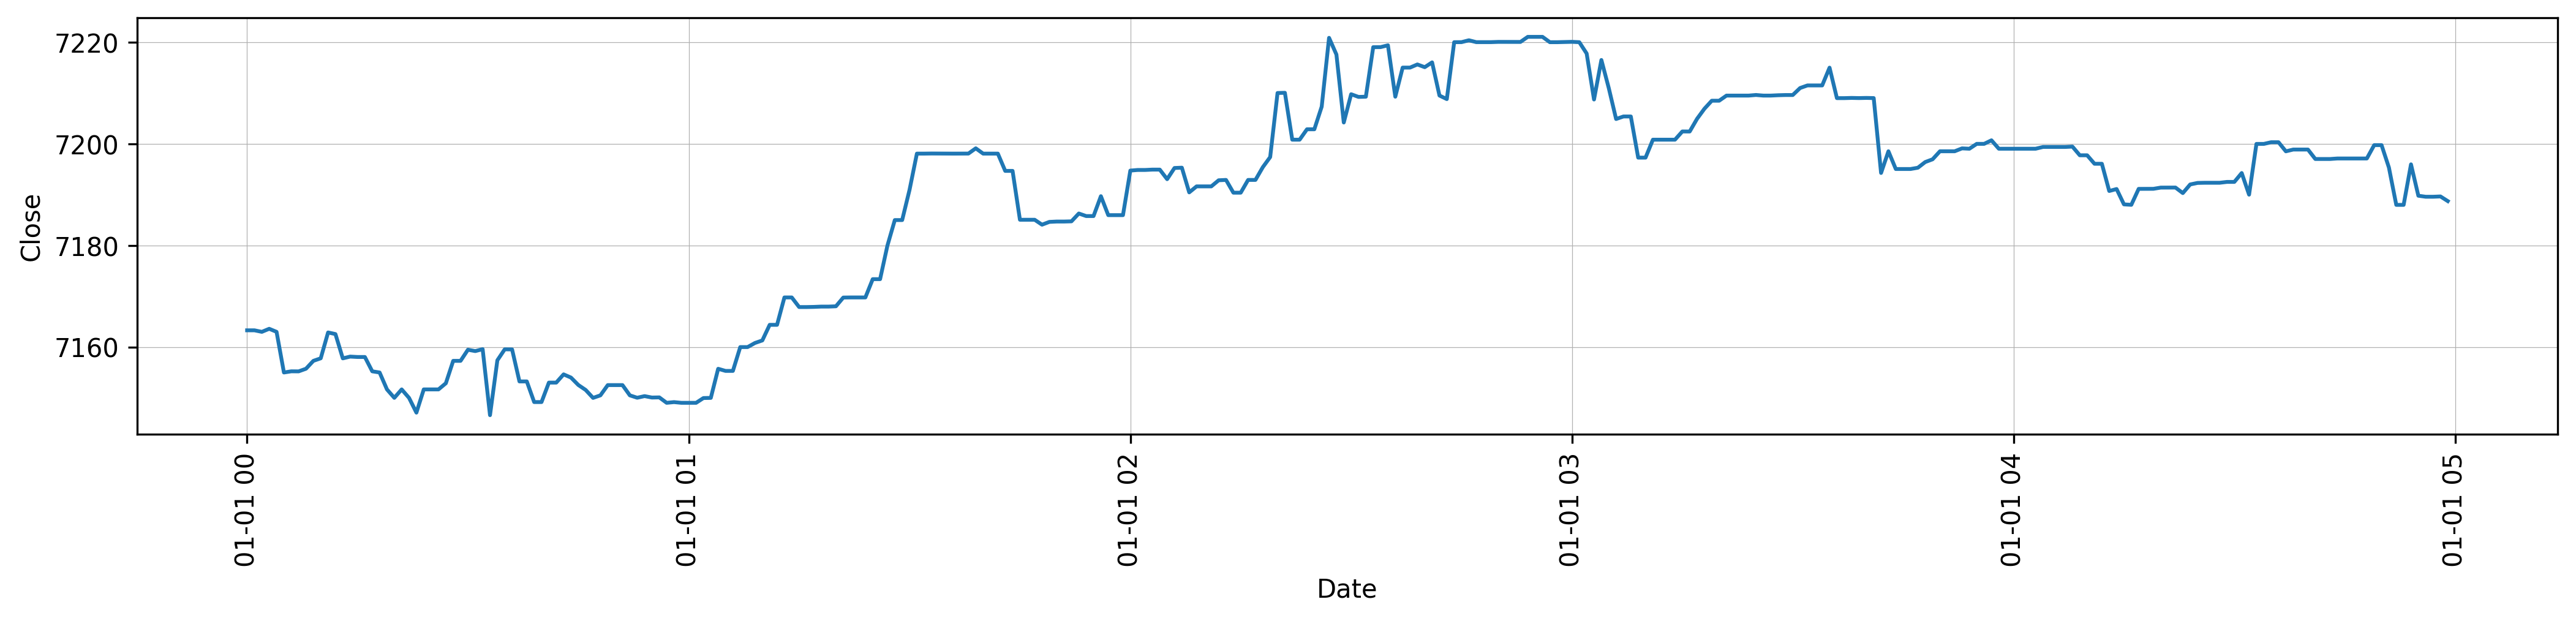

In [5]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=df.tail(300), x='Date', y='Close')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

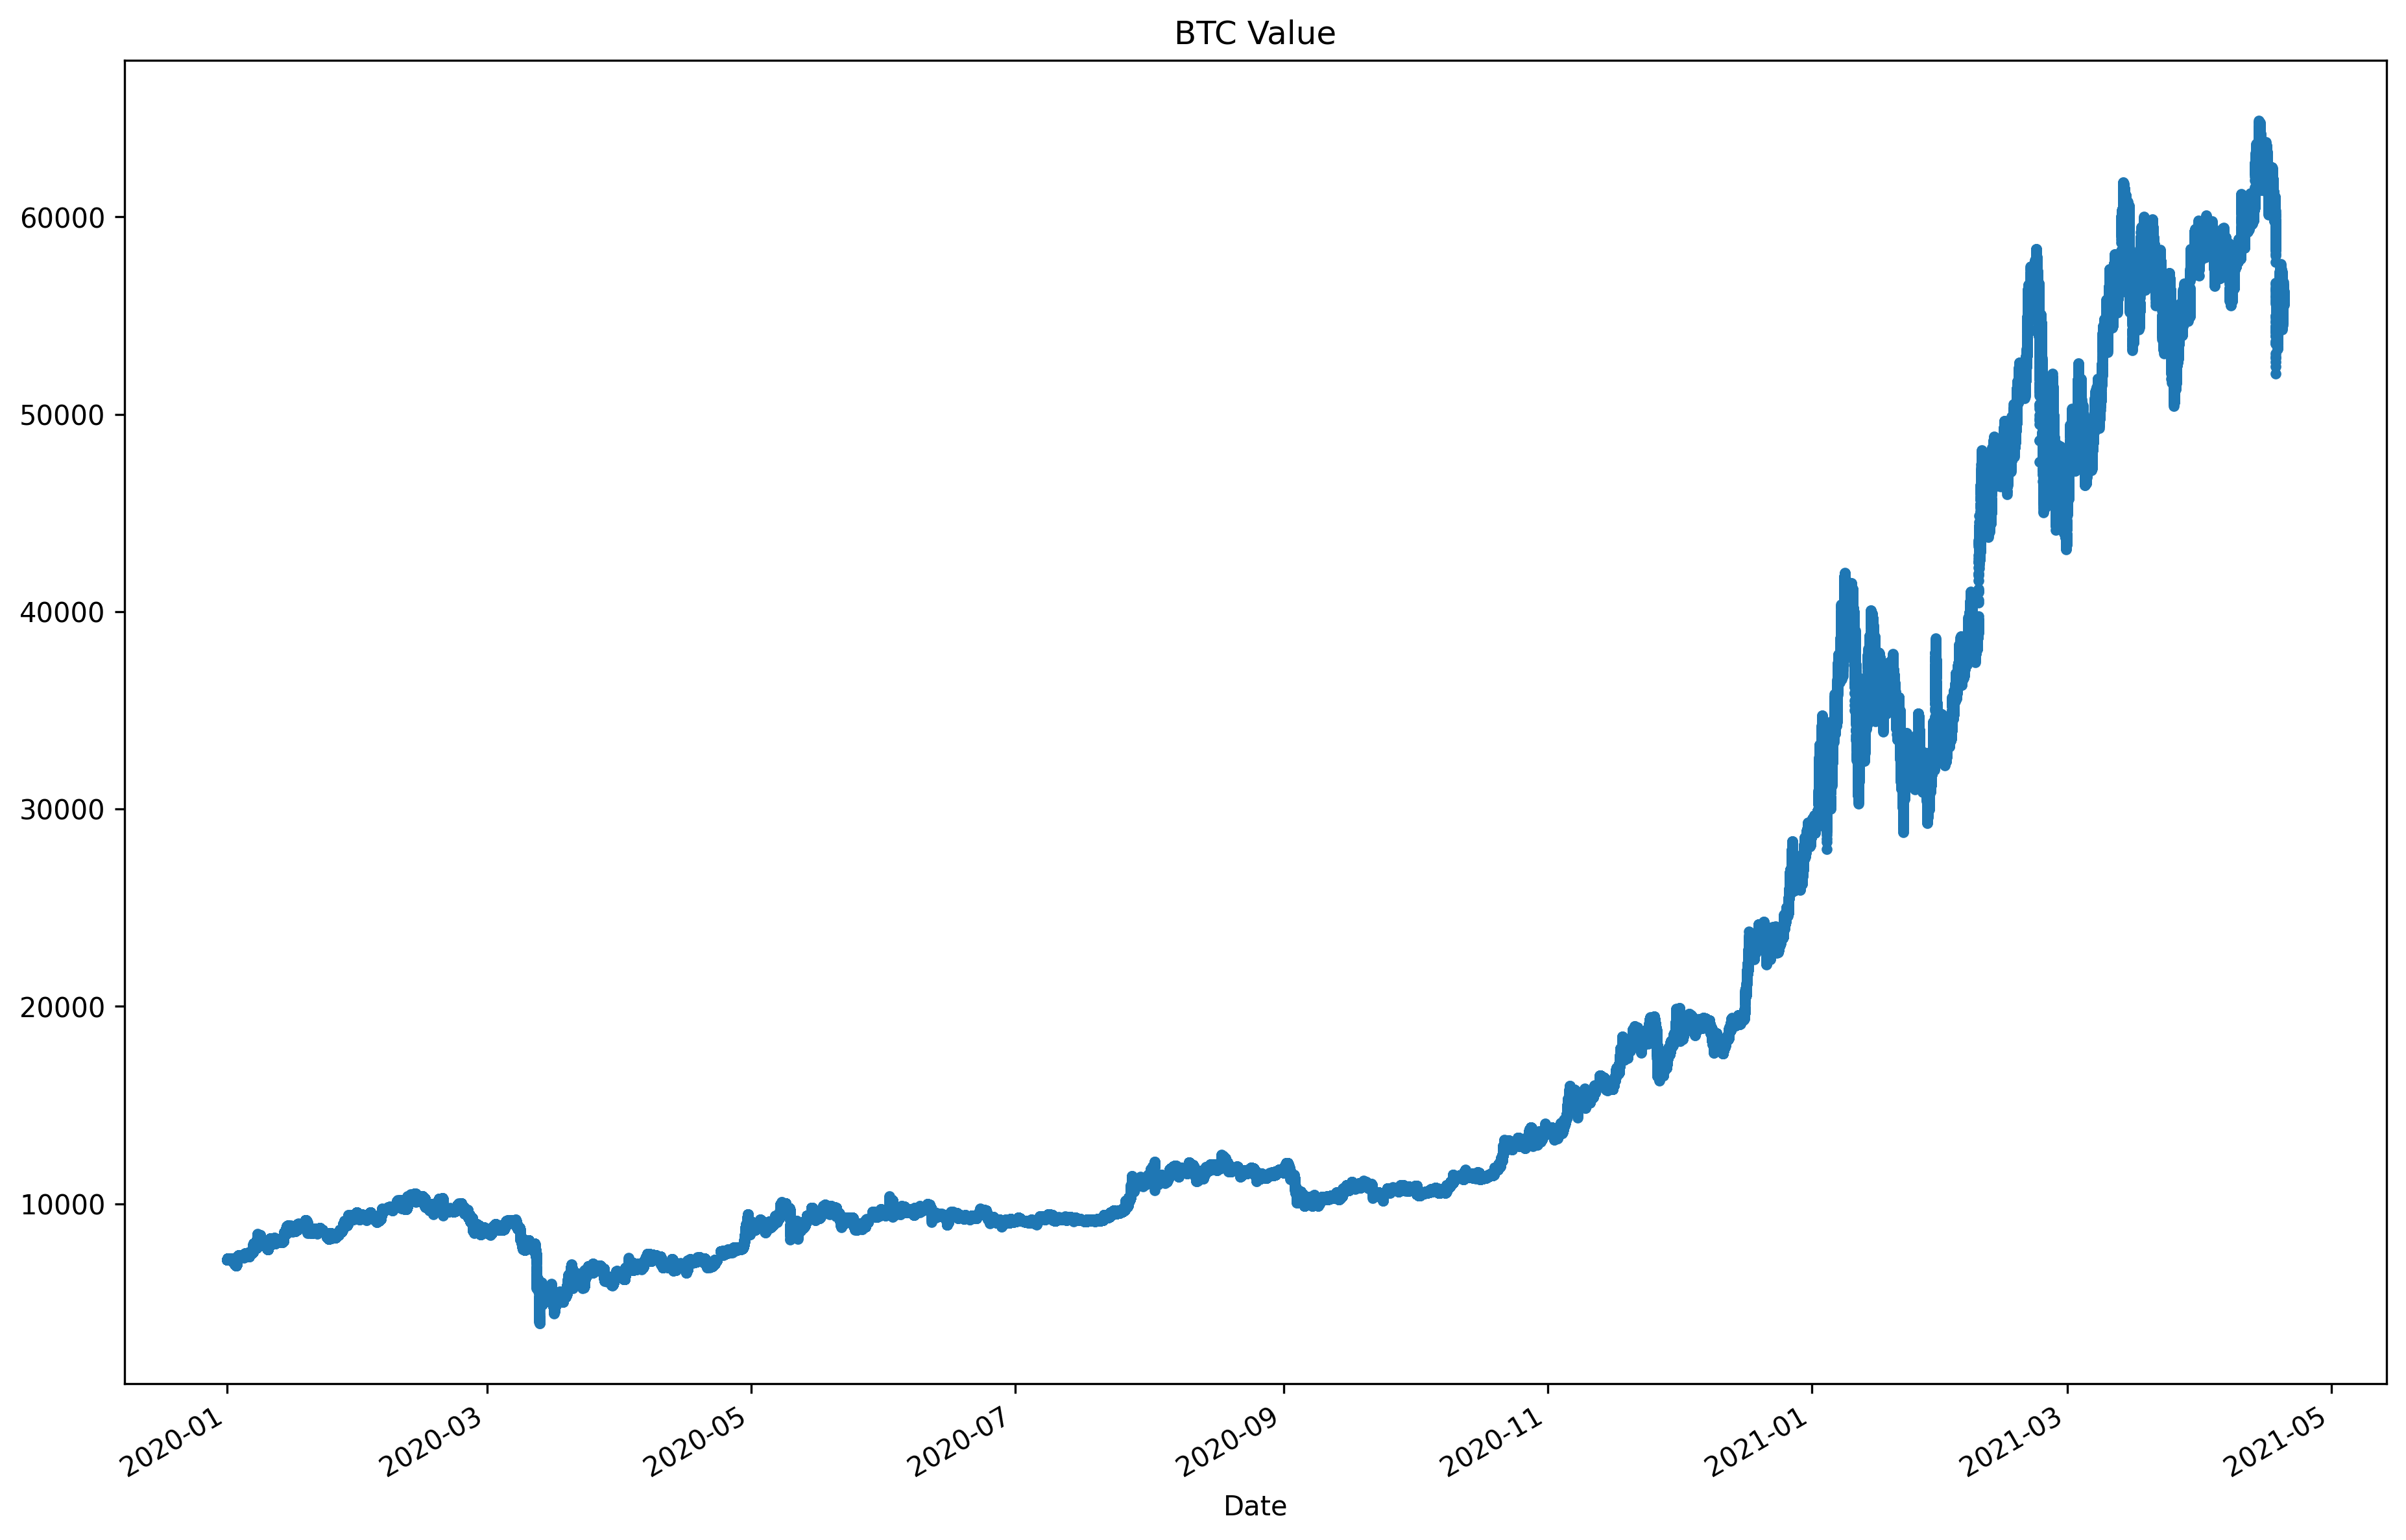

In [15]:
df['Close'].plot(style='.', figsize=(15, 10), title="BTC Value")
plt.show()

In [16]:
data_split = '03-01-2021'
train_data = df.loc[df.index < data_split]
test_data = df.loc[df.index >= data_split]

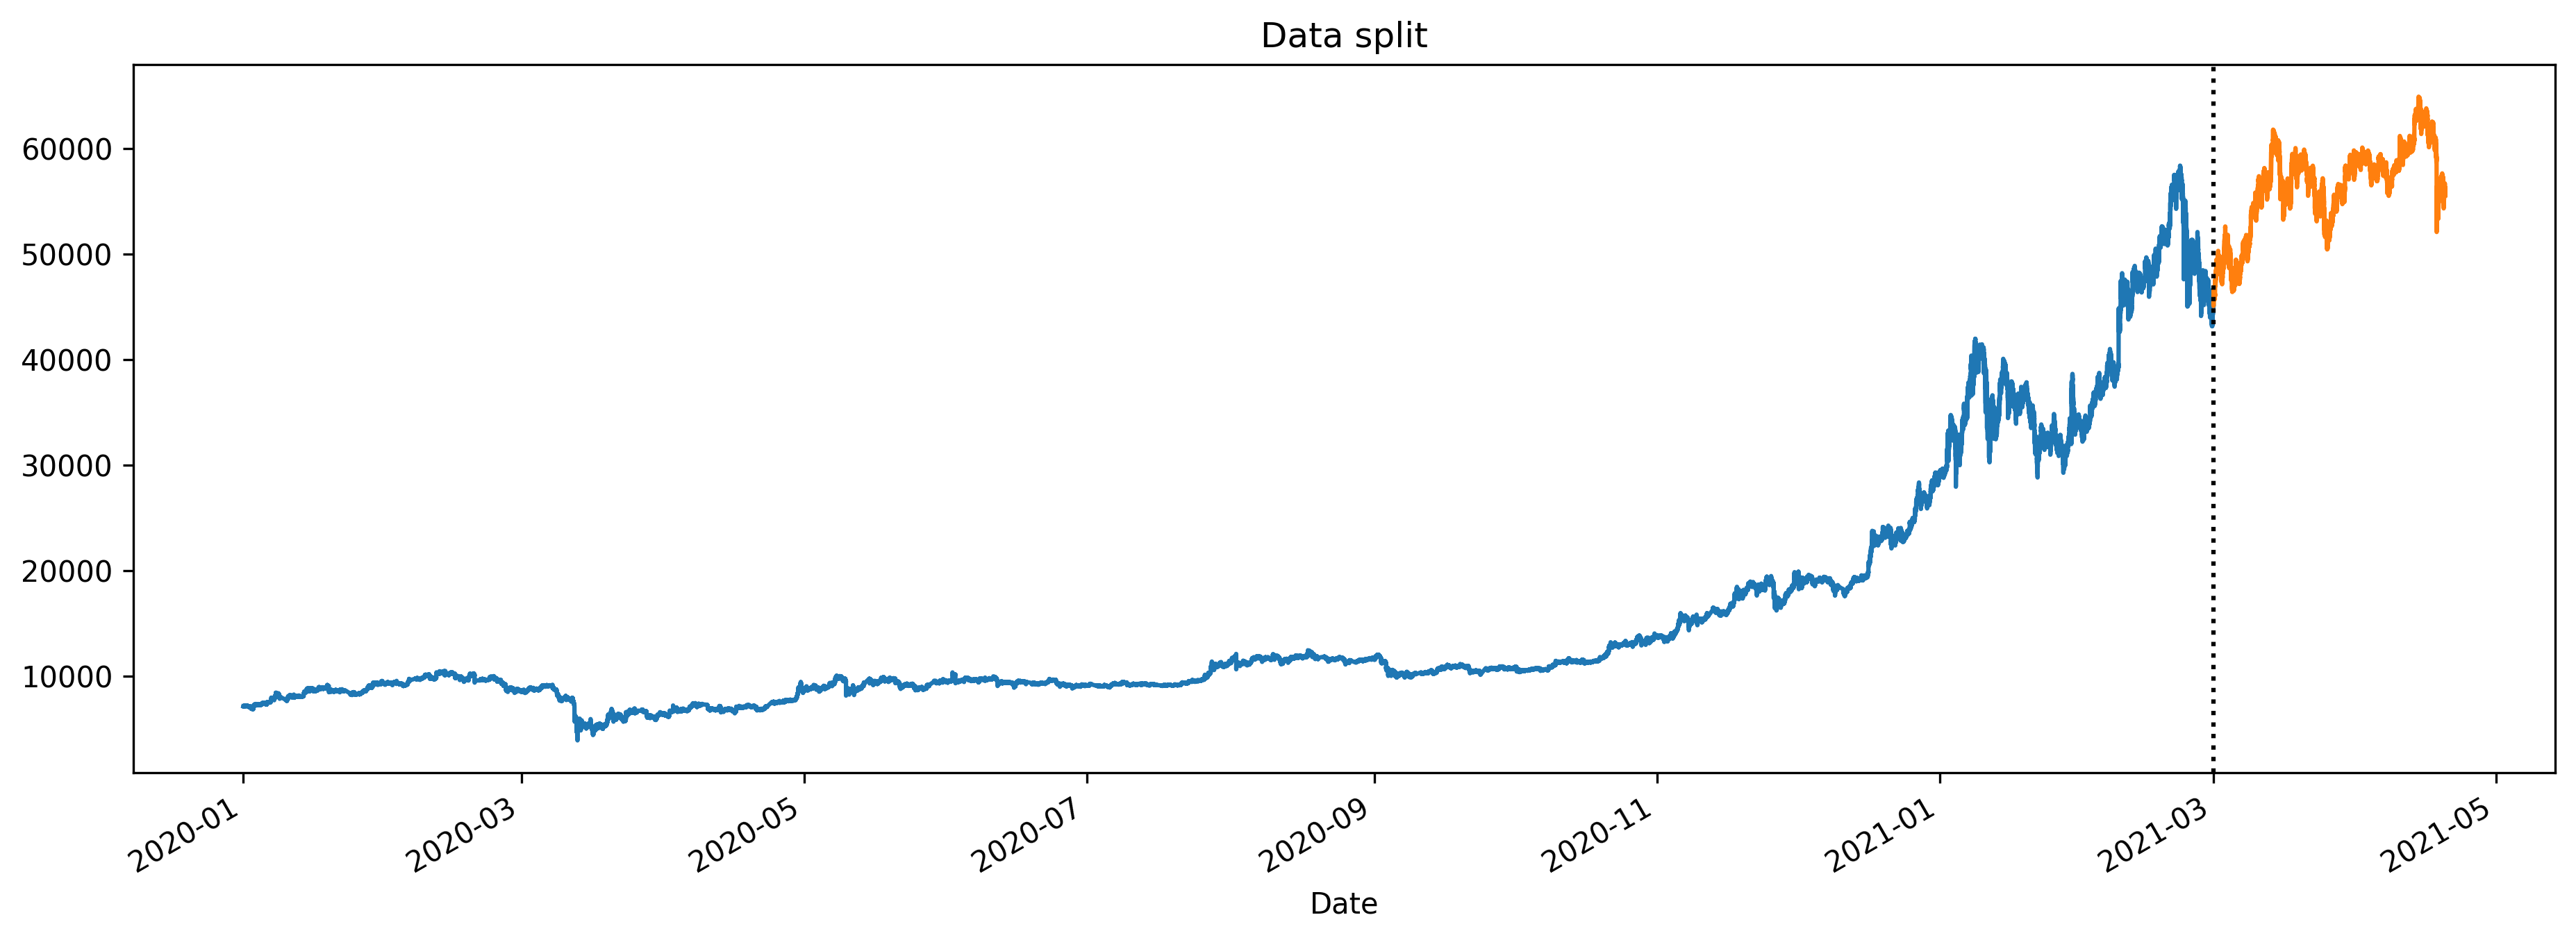

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
train_data['Close'].plot(ax=ax, label='Train data', title="Data split")
test_data['Close'].plot(ax=ax, label='Test Data')
ax.axvline(data_split, color='black', ls='dotted')
plt.show()

<AxesSubplot:xlabel='Date'>

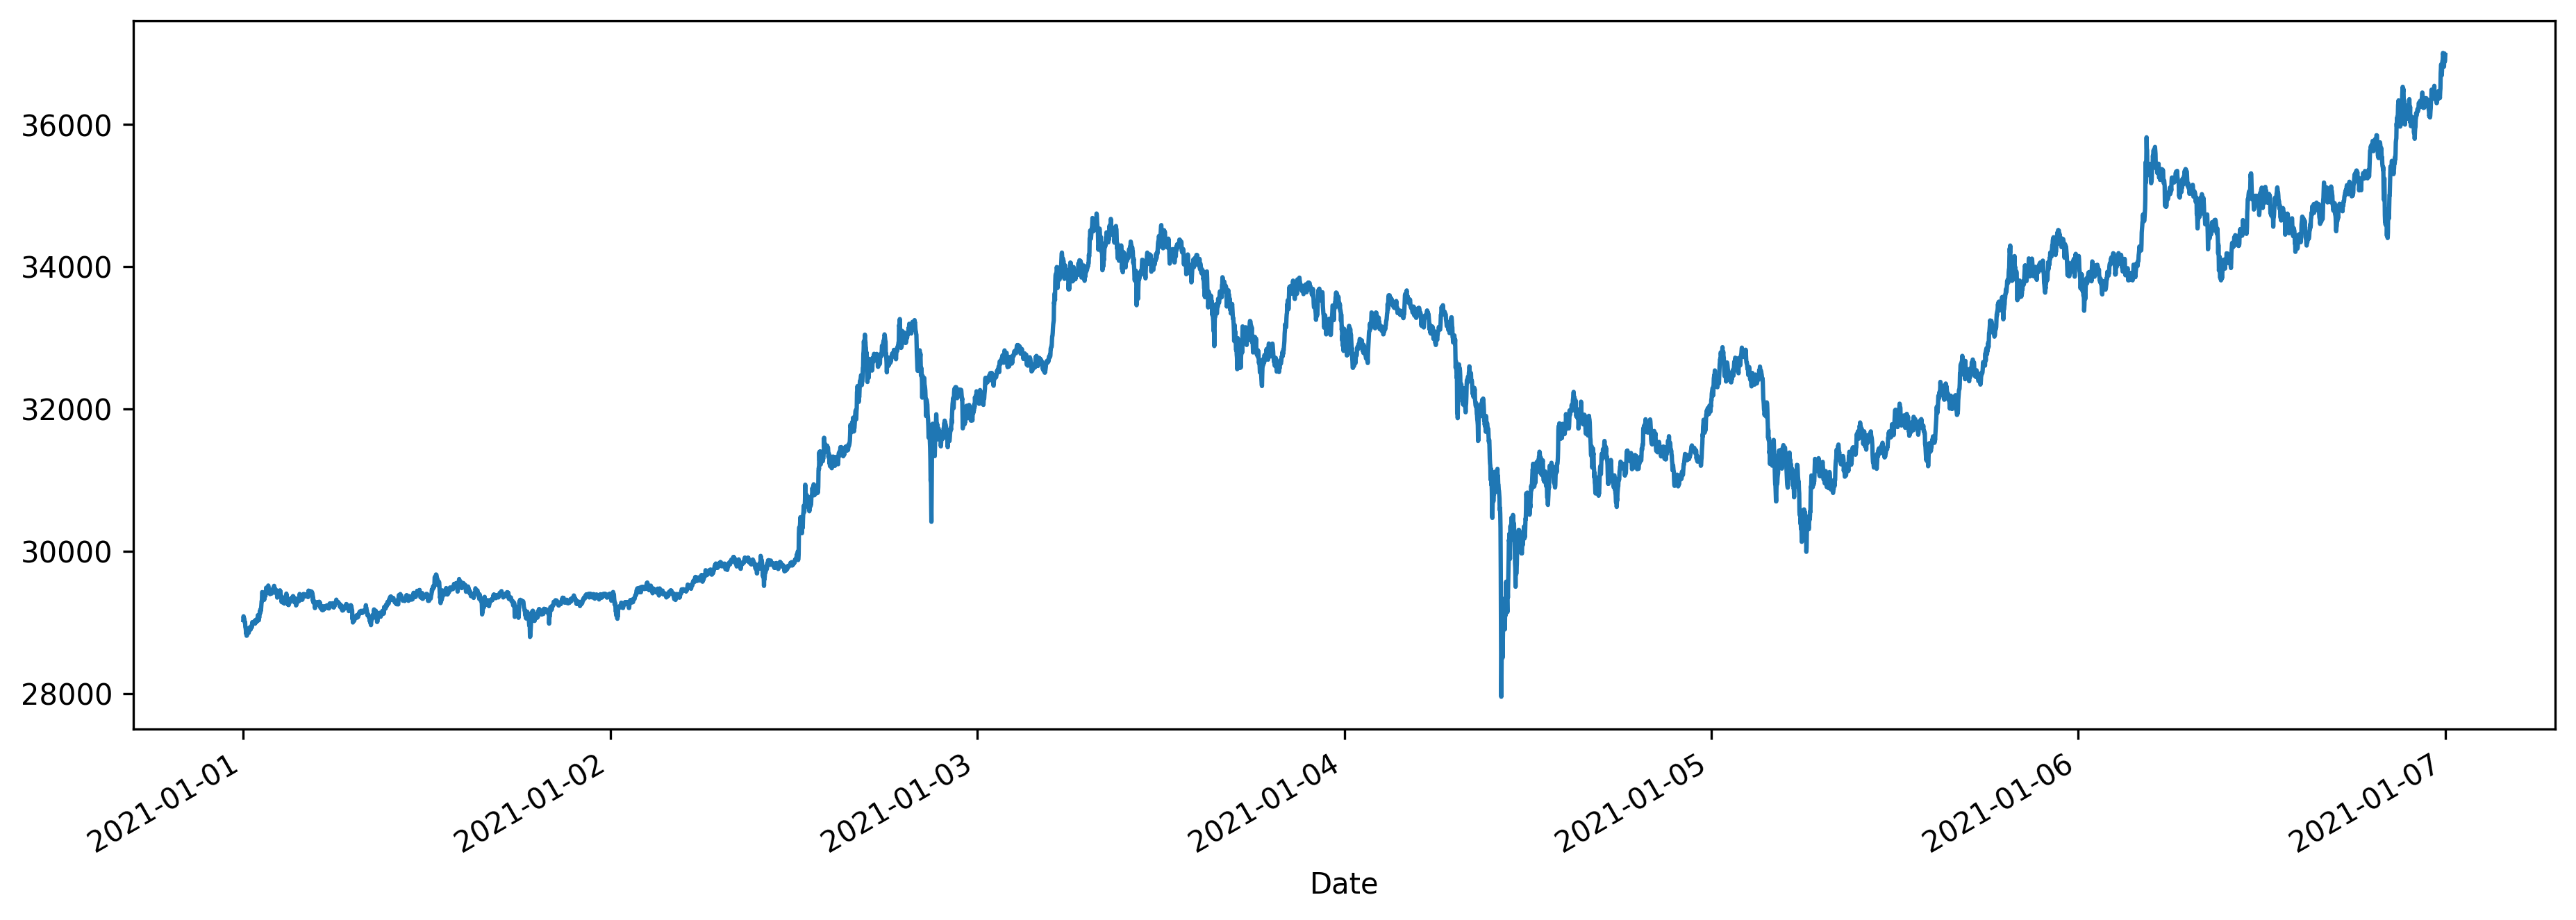

In [20]:
df['Close'].loc[(df.index  >= '01.01.2021') & (df.index <= '01.07.2021')].plot(figsize =(15,5))

In [21]:
def create_features(df):
    df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

In [24]:
df = create_features(df)

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume,hour,dayofweek,month,year,dayofyear
Date,,,,,,,,,,,,
2020-01-01 01:39:00,1.577840e+12,BTCUSD,7198.09,7199.12,7198.09,7199.12,6.000000,1,2,1,2020,1
2020-01-01 01:38:00,1.577840e+12,BTCUSD,7198.09,7198.09,7198.09,7198.09,0.028031,1,2,1,2020,1
2020-01-01 01:37:00,1.577840e+12,BTCUSD,7198.08,7198.09,7198.08,7198.09,0.000010,1,2,1,2020,1
2020-01-01 01:36:00,1.577840e+12,BTCUSD,7198.08,7198.11,7198.08,7198.08,0.131567,1,2,1,2020,1
2020-01-01 01:35:00,1.577840e+12,BTCUSD,7198.09,7198.09,7198.08,7198.08,0.356962,1,2,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 00:04:00,1.577840e+12,BTCUSD,7163.60,7163.60,7163.00,7163.00,1.751844,0,2,1,2020,1
2020-01-01 00:03:00,1.577840e+12,BTCUSD,7163.00,7163.60,7163.00,7163.60,0.002706,0,2,1,2020,1
2020-01-01 00:02:00,1.577840e+12,BTCUSD,7163.30,7164.22,7163.00,7163.00,0.063904,0,2,1,2020,1


In [30]:
def show_distribution(feature):
    fig, ax = plt.subplots(figsize = (15, 5))
    sns.boxenplot(data=df, x=feature, y='Close')
    ax.set_title(f'Close by {feature}')
    plt.show()

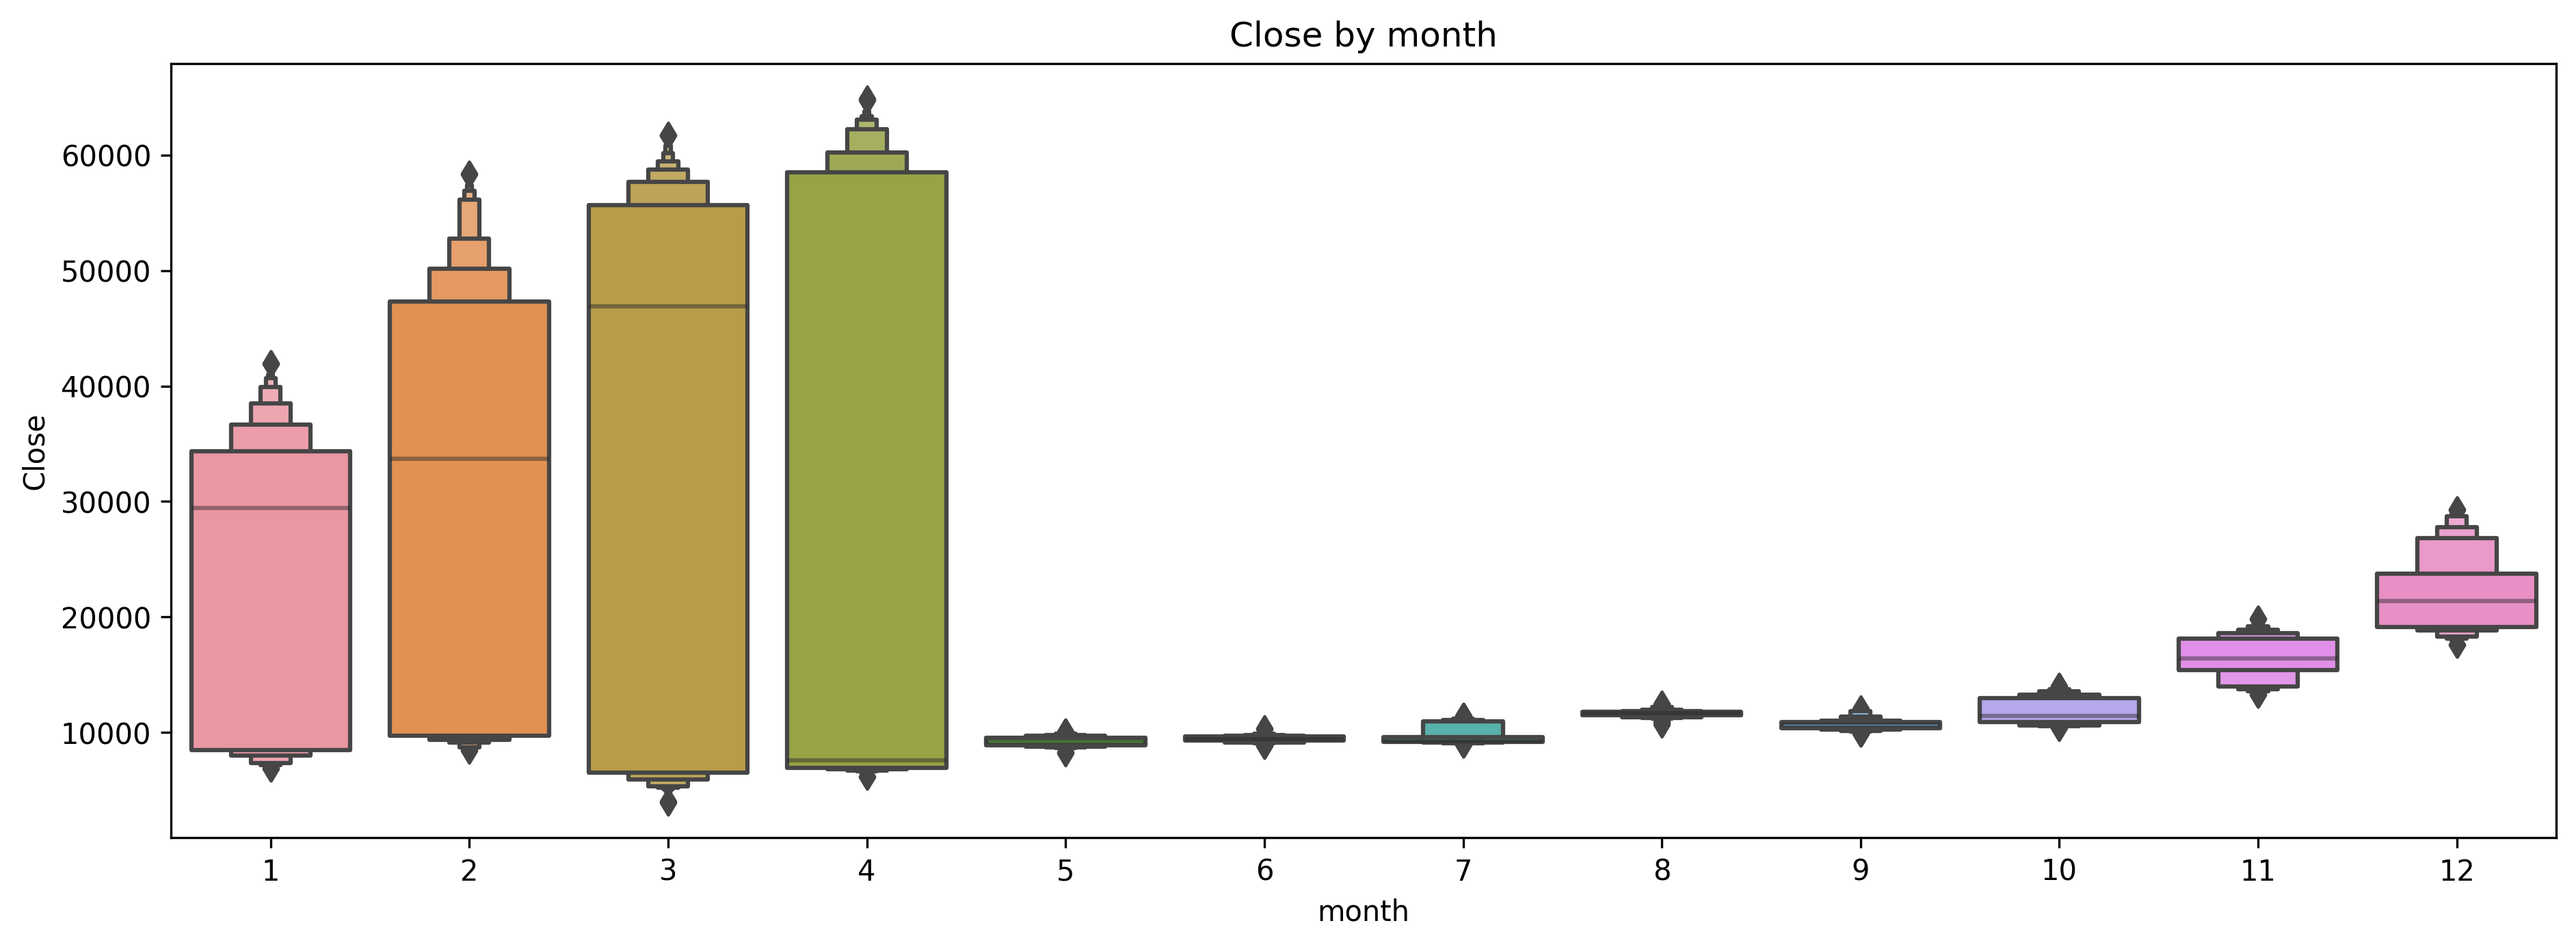

In [31]:
#monthly
show_distribution('month')

In [32]:
model = xgbreg(n_estimators=1000, 
                learning_rate=0.01,
                max_depth = 5,
                objective = "reg:squarederror",
                early_stopping_rounds = 50 
                )

In [33]:
df.columns

Index(['Unix Timestamp', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume',
       'hour', 'dayofweek', 'month', 'year', 'dayofyear'],
      dtype='object')

In [34]:
FEATURES = ['Open', 'High', 'Low', 'Volume', 'hour', 'dayofweek', 'month', 'year', 'dayofyear']
TARGET = ['Close']
train = create_features(train_data)
test = create_features(test_data)

In [35]:
X_train = train[FEATURES]
X_test = test[FEATURES]
y_train = train[TARGET]
y_test = test[TARGET]

In [36]:
model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=True
        )

[0]	validation_0-rmse:18841.75820	validation_1-rmse:56029.76509
[1]	validation_0-rmse:18653.43263	validation_1-rmse:55486.08712
[2]	validation_0-rmse:18466.99023	validation_1-rmse:54947.79338
[3]	validation_0-rmse:18282.41238	validation_1-rmse:54414.74079
[4]	validation_0-rmse:18099.68049	validation_1-rmse:53887.12597
[5]	validation_0-rmse:17918.77629	validation_1-rmse:53364.78393
[6]	validation_0-rmse:17739.68083	validation_1-rmse:52847.50948
[7]	validation_0-rmse:17562.37646	validation_1-rmse:52335.67199
[8]	validation_0-rmse:17386.84451	validation_1-rmse:51828.95401
[9]	validation_0-rmse:17213.06897	validation_1-rmse:51324.12534
[10]	validation_0-rmse:17041.02952	validation_1-rmse:50827.54054
[11]	validation_0-rmse:16870.71069	validation_1-rmse:50332.60894
[12]	validation_0-rmse:16702.09516	validation_1-rmse:49842.67858
[13]	validation_0-rmse:16535.16418	validation_1-rmse:49360.82410
[14]	validation_0-rmse:16369.90394	validation_1-rmse:48880.82205
[15]	validation_0-rmse:16206.29433	

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [41]:
test_data['predictions'] = model.predict(X_test)

In [68]:
test_data.tail()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume,hour,dayofweek,month,year,dayofyear,predicitons,predictions
Date,,,,,,,,,,,,,,
2021-03-01 00:04:00,1.614560e+12,BTCUSD,45183.63,45186.42,45088.02,45150.63,0.889344,0,0,3,2021,60,45141.113281,45141.113281
2021-03-01 00:03:00,1.614560e+12,BTCUSD,45245.79,45261.84,45183.63,45183.63,0.255290,0,0,3,2021,60,45227.960938,45227.960938
2021-03-01 00:02:00,1.614560e+12,BTCUSD,45417.95,45424.34,45245.79,45245.79,1.044848,0,0,3,2021,60,45367.035156,45367.035156
2021-03-01 00:01:00,1.614560e+12,BTCUSD,45346.05,45417.95,45346.05,45417.95,0.381894,0,0,3,2021,60,45384.511719,45384.511719
2021-03-01 00:00:00,1.614560e+12,BTCUSD,45236.45,45346.05,45236.45,45346.05,0.427531,0,0,3,2021,60,45311.988281,45311.988281


In [48]:
df = df.merge(test_data[['predictions']], how='left', left_index=True, right_index=True)

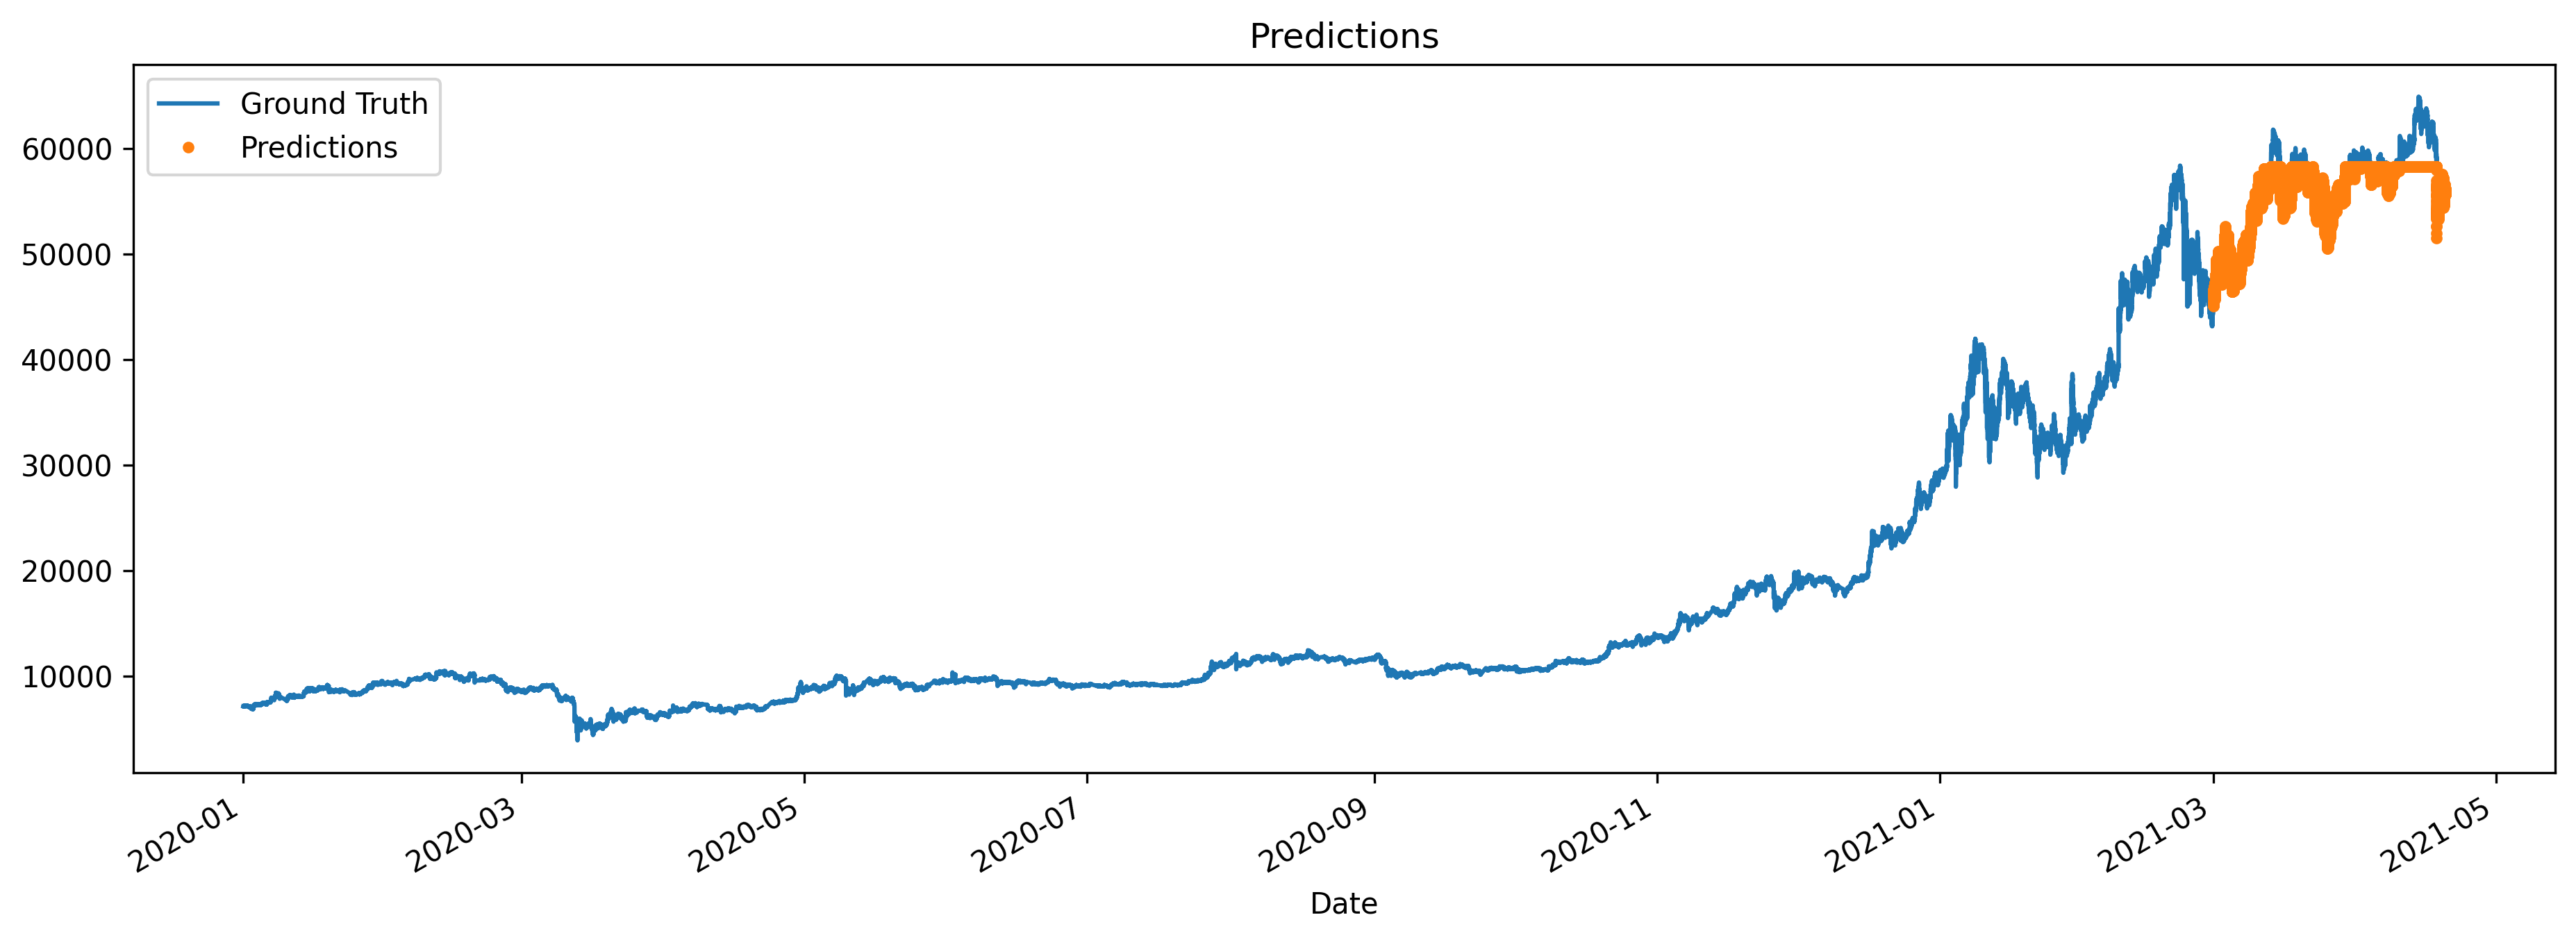

In [49]:
ax = df[['Close']].plot(figsize=(15,5))
df['predictions'].plot(ax=ax, style='.')
plt.legend(['Ground Truth', 'Predictions'])
ax.set_title('Predictions')
plt.show()

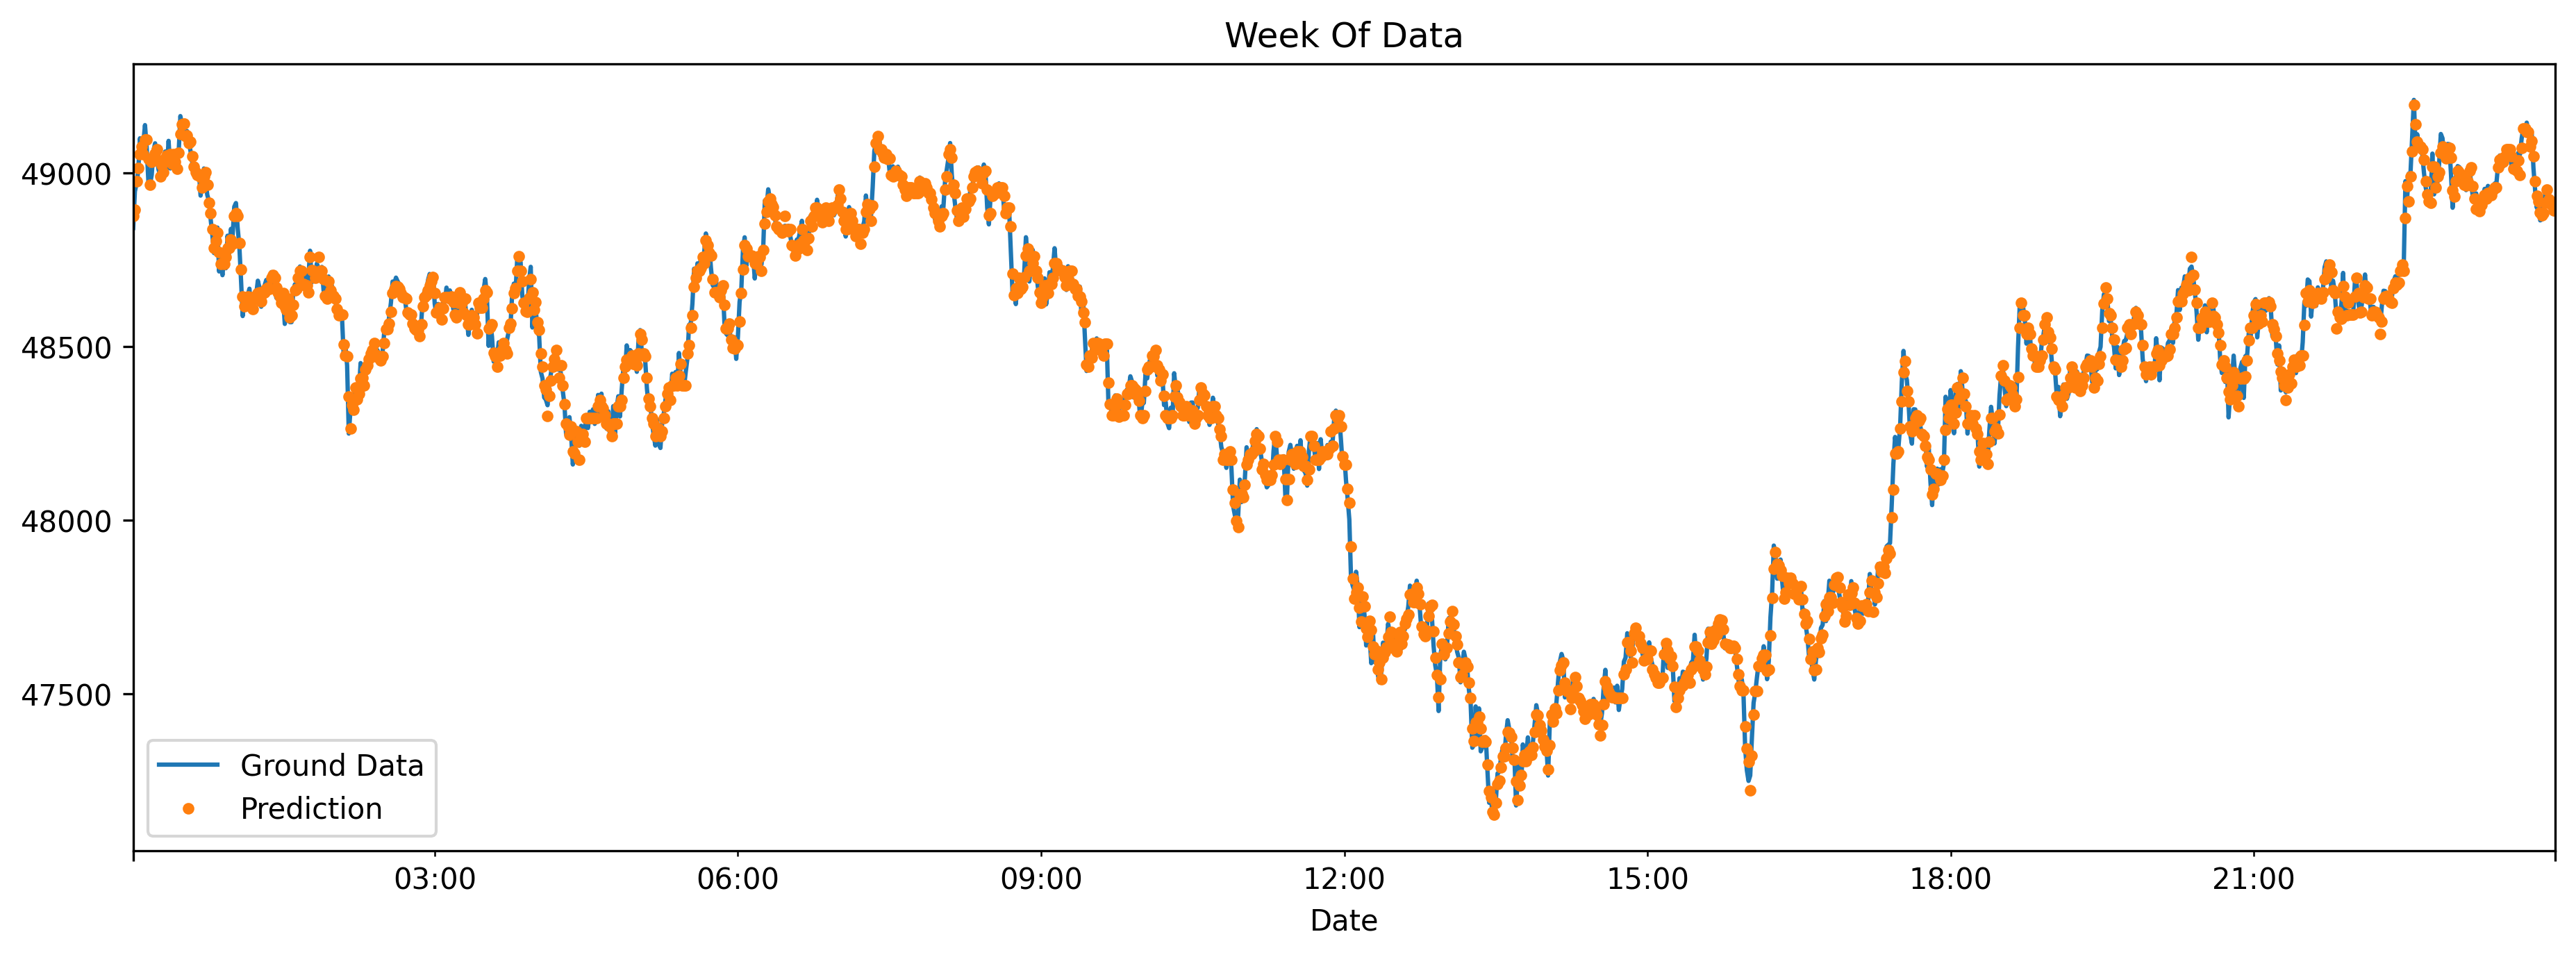

In [71]:
ax = df.loc[(df.index > '2021-03-06') & (df.index < '2021-03-07')]['Close'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index >  '2021-03-06') & (df.index <  '2021-03-07')]['predictions'] \
    .plot(style='.')
plt.legend(['Ground Data','Prediction'])
plt.show()

In [82]:
df.loc[(df.index > '2021-04-16') & (df.index < '2021-04-30')].sort_values(by='Date', ascending=True).head(100)

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume,hour,dayofweek,month,year,dayofyear,predictions
Date,,,,,,,,,,,,,
2021-04-16 00:01:00,1.618530e+12,BTCUSD,63349.82,63362.80,63295.27,63327.34,4.508941,0,4,4,2021,106,58278.972656
2021-04-16 00:02:00,1.618530e+12,BTCUSD,63327.34,63350.13,63294.52,63307.50,4.175692,0,4,4,2021,106,58278.972656
2021-04-16 00:03:00,1.618530e+12,BTCUSD,63297.24,63338.84,63292.98,63292.98,0.058678,0,4,4,2021,106,58279.148438
2021-04-16 00:04:00,1.618530e+12,BTCUSD,63292.98,63325.48,63251.75,63325.48,0.899977,0,4,4,2021,106,58279.070312
2021-04-16 00:05:00,1.618530e+12,BTCUSD,63325.48,63337.94,63303.00,63337.94,0.035385,0,4,4,2021,106,58279.148438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16 01:36:00,1.618540e+12,BTCUSD,63107.62,63107.62,63061.30,63073.40,2.864156,1,4,4,2021,106,58278.972656
2021-04-16 01:37:00,1.618540e+12,BTCUSD,63073.40,63073.40,63025.00,63025.01,0.643011,1,4,4,2021,106,58279.070312
2021-04-16 01:38:00,1.618540e+12,BTCUSD,63025.01,63069.06,62934.53,63001.48,1.952553,1,4,4,2021,106,58278.972656
